In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Threshold-Based Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.85      1.00      0.92       469

    accuracy                           0.85       549
   macro avg       0.43      0.50      0.46       549
weighted avg       0.73      0.85      0.79       549



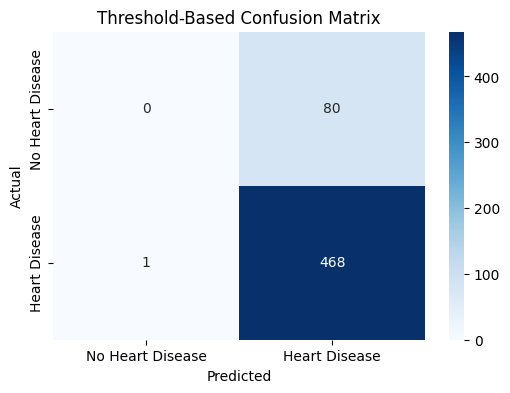

In [23]:

# Load the data
extracted_features = pd.read_csv('extracted_features.csv')
patient_details = pd.read_csv('patient_details.csv')

# Prepare the target variable
patient_details['target'] = patient_details['Reason for admission'].apply(lambda x: 0 if x == 'Healthy control' else 1)

# Join features and target
data = pd.concat([extracted_features, patient_details['target']], axis=1)

# Identify the most important feature for threshold-based classification (r_wave_amplitude)
most_important_feature = 'r_wave_amplitude'
thresholds = np.linspace(data[most_important_feature].min(), data[most_important_feature].max(), 100)
accuracies = [accuracy_score(data['target'], (data[most_important_feature] > thresh).astype(int)) for thresh in thresholds]
best_threshold = thresholds[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Apply threshold for prediction
data['predicted_threshold'] = (data[most_important_feature] > best_threshold).astype(int)

# Display classification report for threshold-based prediction
print("Threshold-Based Classification Report:\n", classification_report(data['target'], data['predicted_threshold'], zero_division=0))

# Confusion matrix for threshold-based prediction
threshold_conf_matrix = confusion_matrix(data['target'], data['predicted_threshold'])
plt.figure(figsize=(6, 4))
sns.heatmap(threshold_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Threshold-Based Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:

# CNN Model Preparation
# Prepare features and labels for CNN model
X = extracted_features.values
y = patient_details['target'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=11, batch_size=64, verbose=1)

# Print final training and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.2f}")
print(f"Final Test Accuracy: {val_accuracy:.2f}")

# Training predictions and report
y_train_pred_prob = model.predict(X_train).ravel()
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_classification_report = classification_report(y_train, y_train_pred, zero_division=0)
print("CNN Training Classification Report:\n", train_classification_report)

# Test predictions and report
y_test_pred_prob = model.predict(X_test).ravel()
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
test_classification_report = classification_report(y_test, y_test_pred, zero_division=0)
print("CNN Test Classification Report:\n", test_classification_report)

Epoch 1/11


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7396 - loss: 0.5997 - val_accuracy: 0.8545 - val_loss: 0.4105
Epoch 2/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8521 - loss: 0.4783 - val_accuracy: 0.8545 - val_loss: 0.4026
Epoch 3/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8684 - loss: 0.4214 - val_accuracy: 0.8545 - val_loss: 0.4031
Epoch 4/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8530 - loss: 0.4443 - val_accuracy: 0.8545 - val_loss: 0.4040
Epoch 5/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8767 - loss: 0.3936 - val_accuracy: 0.8545 - val_loss: 0.3956
Epoch 6/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8676 - loss: 0.3972 - val_accuracy: 0.8545 - val_loss: 0.3957
Epoch 7/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8673 - loss: 0.3947 - val_accuracy: 0.8545 - val_loss: 0.3966
Epoch 8/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8685 - loss: 0.3922 - val_accuracy: 0.8545 - val_loss: 0.4002
Epoch 9/11


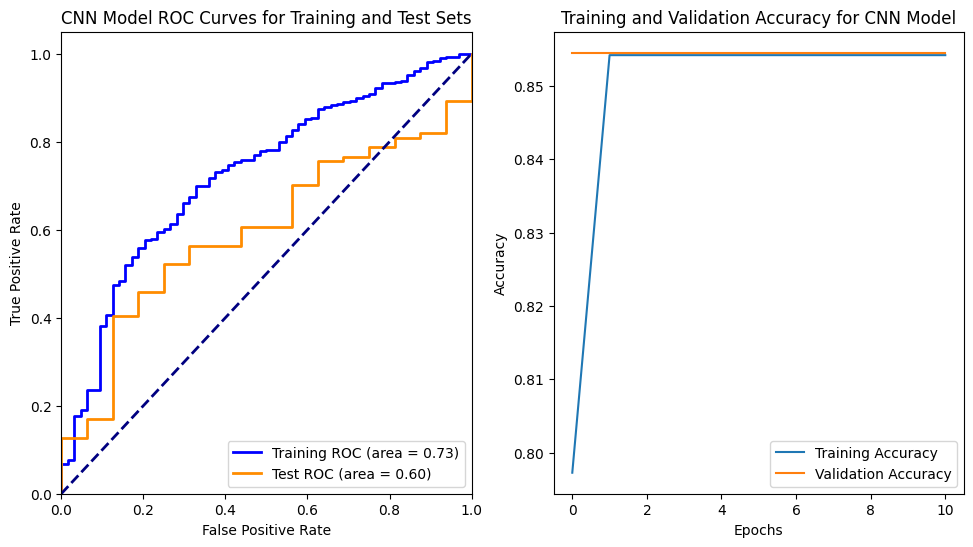

In [33]:

# Calculate ROC and AUC for training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot CNN ROC Curves for training and test sets, and Accuracy History
plt.figure(figsize=(18, 6))

# ROC Curve for Training and Test Sets
plt.subplot(1, 3, 1)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Model ROC Curves for Training and Test Sets')
plt.legend(loc="lower right")

# Accuracy History for CNN Model
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for CNN Model')

plt.show()
